In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

In [ ]:
X,Y =make_blobs(n_samples=100,n_features=2,centers=2,random_state=42)
print(X.shape)
print(Y.shape)

(100, 2)
(100,)


<Axes: >

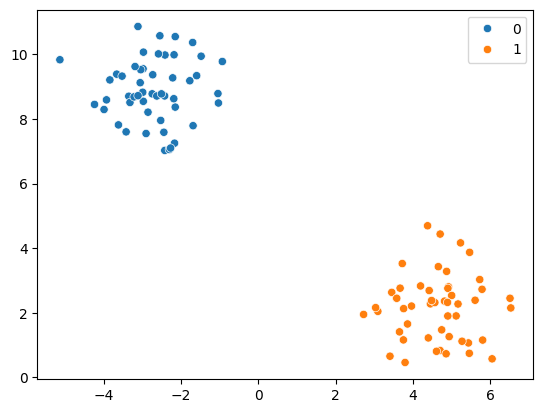

In [ ]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=Y)

IMPORTANT FUNCTIONS

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

PREDICT

In [ ]:
def predict(x, weights):
  z=np.dot(x,weights)

  return sigmoid(z)

LOSS

In [ ]:
def loss(y,y_hat):
  return -np.mean(y*(np.log(y_hat))+(1-y)*np.log(1-y_hat))


UPDATE

In [ ]:
def update(x,y,weights,learning_rate):
  y_hat=predict(x,weights)
  dw=np.dot(x.T,(y_hat-y))/x.shape[0]
  weights=weights-learning_rate*dw
  return weights

TRAIN

In [ ]:
def train(x,y,learning_rate,epocs):
  ones=np.ones((x.shape[0],1))
  x=np.hstack((ones,x))

  weights=np.zeros((x.shape[1]))

  for epoch in range(epocs):
    weights=update(x,y,weights,learning_rate)

    if(epoch%100==0):
      loss_value=loss(y,predict(x,weights))
      print(f"epoch:{epoch} loss:{loss_value}")


  return weights




In [ ]:
weights=train(X,Y,0.01,1000)

epoch:0 loss:0.6341823027072981
epoch:100 loss:0.06904660822944354
epoch:200 loss:0.036510815052413055
epoch:300 loss:0.025009522638035842
epoch:400 loss:0.01910895474035573
epoch:500 loss:0.015508632312417552
epoch:600 loss:0.013077613482733452
epoch:700 loss:0.01132297584827869
epoch:800 loss:0.009995243636820451
epoch:900 loss:0.008954481958334828


In [ ]:
weights

array([ 0.13283371,  1.19500844, -0.31786504])

PREDICTIONS

In [ ]:
def get_prediction(x,weights,label=True):
  if(x.shape[1]!=weights.shape[0]):
    ones=np.ones((x.shape[0],1))
    x=np.hstack((ones,x))

  prob=predict(x,weights)
  if(label==True):
    labels=np.zeros((prob.shape[0]))
    labels[prob>=0.5]=1
    return labels
  else:
    return prob

In [ ]:
x_vals=np.linspace(X[:,0].min()-1,X[:,0].max()+1,100)
y_vals=-(weights[0]+weights[1]*x_vals)/weights[2]

VISUALIZATION

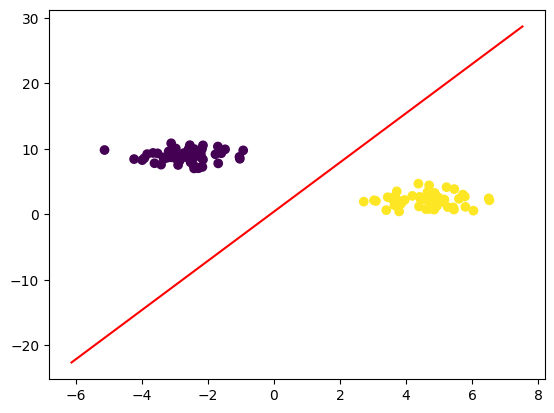

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x_vals,y_vals,c='r')
plt.show()